In [54]:
import numpy as np
import requests, gzip, os, hashlib
import matplotlib.pyplot as plt
import os

# Fetch the data

In [55]:
#fetch data
from matplotlib.pyplot import imshow

path='F:\SourceCode\MachineLearning_HUS_2021\Class\MNIST_data'
def fetch(url):
    fp = os.path.join(path, hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

X = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
print(X.shape)
Y = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28*28))
print(X_test.shape)
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

(60000, 28, 28)
(10000, 784)


Validation split

In [56]:
rand=np.arange(5000)
np.random.shuffle(rand)
train_no=rand[:1000]

val_no=np.setdiff1d(rand,train_no)

X_train,X_val=X[train_no,:,:],X[val_no,:,:]
Y_train,Y_val=Y[train_no],Y[val_no]

In [57]:
def init(x,y):
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
l1=init(28*28,128)
l2=init(128,10)

#Sigmoid funstion
def sigmoid(x):
    return 1/(np.exp(-x)+1)

#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

def softmax(x):
    exponents=np.exp(x)
    return exponents/np.sum(exponents)

In [58]:
out=np.array([1,2,3])
softmax(out),sum(softmax(out))

(array([0.09003057, 0.24472847, 0.66524096]), 1.0)

In [59]:
output_of_layer_2=np.array([12,34,-67,23,0,134,76,24,78,-98])
a=softmax(output_of_layer_2)
a,sum(a)

(array([1.03770332e-053, 3.72007598e-044, 5.09107081e-088, 6.21315959e-049,
        6.37586958e-059, 1.00000000e+000, 6.47023493e-026, 1.68891188e-048,
        4.78089288e-025, 1.75258947e-101]),
 1.0)

In [60]:
x=np.argmax(a)
x,output_of_layer_2[x]

(5, 134)

In [61]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))
#forward and backward pass
def forward_backward_pass(x,y):
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1


    x_l1=x.dot(l1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(l2)
    out=softmax(x_l2)


    error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
    update_l2=x_sigmoid.T@error


    error=((l2).dot(error.T)).T*d_sigmoid(x_l1)
    update_l1=x.T@error

    return out,update_l1,update_l2

In [62]:
Y_train

array([6, 2, 8, 2, 5, 7, 7, 1, 6, 9, 6, 2, 5, 8, 4, 5, 6, 5, 5, 6, 9, 7,
       2, 3, 4, 0, 1, 8, 8, 9, 0, 9, 3, 6, 5, 3, 1, 7, 8, 4, 7, 3, 6, 2,
       1, 4, 0, 1, 3, 0, 9, 7, 8, 1, 6, 6, 2, 5, 0, 1, 2, 2, 8, 0, 7, 1,
       3, 4, 4, 6, 1, 5, 1, 5, 4, 1, 1, 3, 2, 3, 2, 5, 5, 5, 8, 9, 7, 4,
       4, 2, 5, 8, 2, 6, 5, 9, 0, 3, 3, 3, 4, 3, 1, 6, 0, 8, 8, 9, 3, 1,
       3, 9, 1, 9, 3, 6, 5, 9, 6, 5, 2, 9, 4, 8, 2, 0, 3, 4, 7, 3, 5, 5,
       7, 8, 8, 9, 6, 3, 9, 8, 2, 2, 9, 7, 1, 1, 0, 2, 7, 9, 5, 7, 6, 7,
       4, 6, 5, 2, 8, 6, 4, 8, 2, 6, 5, 5, 3, 8, 1, 9, 8, 2, 3, 5, 5, 2,
       5, 9, 1, 7, 0, 3, 9, 1, 2, 6, 5, 2, 9, 6, 6, 1, 2, 3, 8, 4, 9, 1,
       6, 9, 7, 4, 2, 1, 8, 4, 5, 1, 1, 2, 1, 7, 6, 4, 0, 3, 8, 1, 6, 6,
       6, 2, 0, 0, 6, 2, 1, 9, 1, 7, 2, 5, 9, 4, 0, 7, 7, 7, 2, 6, 7, 7,
       3, 0, 1, 3, 4, 6, 3, 1, 6, 1, 2, 3, 7, 7, 5, 6, 4, 9, 7, 3, 9, 1,
       1, 7, 1, 9, 6, 7, 2, 9, 1, 1, 5, 5, 7, 5, 6, 0, 3, 3, 5, 9, 7, 6,
       4, 8, 1, 6, 9, 3, 3, 2, 4, 4, 5, 4, 9, 4, 8,

In [63]:
ex=np.array(Y_train[1]).reshape(1,1)
ex

array([[2]], dtype=uint8)

In [64]:
example_out = np.zeros((len(ex),10), np.float32)
example_out[range(example_out.shape[0]),ex] = 1
example_out

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
epochs=10000
lr=0.001
batch=128

losses,accuracies,val_accuracies=[],[],[]

for i in range(epochs):
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample].reshape((-1,28*28))
    y=Y_train[sample]


    out,update_l1,update_l2=forward_backward_pass(x,y)

    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)

    loss=((category-y)**2).mean()
    losses.append(loss.item())

    l1=l1-lr*update_l1
    l2=l2-lr*update_l2

    if(i%20==0):
        X_val=X_val.reshape((-1,28*28))
        val_out=np.argmax(softmax(sigmoid(X_val.dot(l1)).dot(l2)),axis=1)
        val_acc=(val_out==Y_val).mean()
        val_accuracies.append(val_acc.item())
    if(i%500==0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')


For 0th epoch: train accuracy: 0.023 | validation accuracy:0.070
For 500th epoch: train accuracy: 0.711 | validation accuracy:0.680
For 1000th epoch: train accuracy: 0.773 | validation accuracy:0.747
For 1500th epoch: train accuracy: 0.789 | validation accuracy:0.767
For 2000th epoch: train accuracy: 0.797 | validation accuracy:0.780
For 2500th epoch: train accuracy: 0.859 | validation accuracy:0.788
For 3000th epoch: train accuracy: 0.844 | validation accuracy:0.794
For 3500th epoch: train accuracy: 0.836 | validation accuracy:0.798
For 4000th epoch: train accuracy: 0.859 | validation accuracy:0.804
For 4500th epoch: train accuracy: 0.781 | validation accuracy:0.810
For 5000th epoch: train accuracy: 0.836 | validation accuracy:0.813
For 5500th epoch: train accuracy: 0.883 | validation accuracy:0.816
For 6000th epoch: train accuracy: 0.898 | validation accuracy:0.818
For 6500th epoch: train accuracy: 0.852 | validation accuracy:0.821
For 7000th epoch: train accuracy: 0.812 | validation

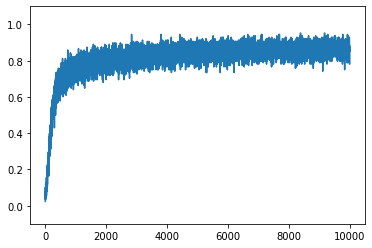

In [66]:
plt.ylim(-0.1, 1.1)
plt.plot(accuracies)

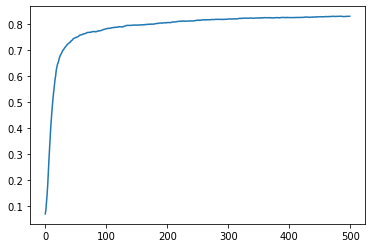

In [67]:
plt.plot(val_accuracies)

In [68]:
test_out=np.argmax(softmax(sigmoid(X_test.dot(l1)).dot(l2)),axis=1)
test_acc=(test_out==Y_test).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

Test accuracy = 81.68%


array([6], dtype=int64)

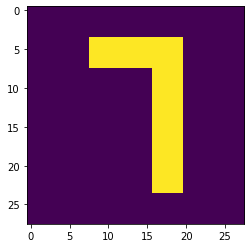

In [69]:
m = [[0,0,0,0,0,0,0],
     [0,0,10,10,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,10,0,0],
     [0,0,0,0,0,0,0]]

m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in m])
m=m.reshape(1,-1)
imshow(m.reshape(28,28))
x = np.argmax(sigmoid(m.dot(l1)).dot(l2),axis=1)
x

array([1], dtype=int64)

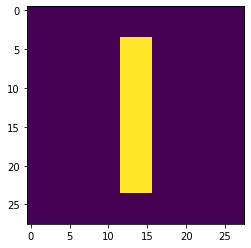

In [70]:
n = [[0,0,0,0,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,10,0,0,0],
     [0,0,0,0,0,0,0]]

n = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in n])
n=n.reshape(1,-1)
imshow(n.reshape(28,28))
x = np.argmax(sigmoid(n.dot(l1)).dot(l2),axis=1)
x